In [2]:
import re
import datetime
import calendar
from math import sqrt

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

C:\Program Files\Anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
import seaborn as sns
sns.set_style('ticks')
import warnings
warnings.filterwarnings('ignore')

In [4]:
def parse_date_string(x):
    dt_obj = datetime.datetime.strptime(x, "%b-%y")
    day=calendar.monthrange(dt_obj.year, dt_obj.month)[1]
    last_date = '{}'.format(day)+datetime.datetime.strftime(dt_obj, "-%m-%Y")
    return datetime.datetime.strptime(last_date, "%d-%m-%Y")
df = pd.read_csv('Cloud Price Data.csv')
display(df.head())

,Months,Price
0,Jan-19,32USD
1,Feb-19,57USD
2,Mar-19,63USD
3,Apr-19,82USD
4,May-19,75USD


In [5]:
#Change Months column from string to datetime format
df['Months'] = df['Months'].apply(lambda x: parse_date_string(x))

df.set_index('Months', inplace=True)

#Change the Price Column to integers
df['Price']=df['Price'].apply(lambda x:float(re.match(r'[0-9]*', x).group()))
df

,Price
Months,
2019-01-31,32.0
2019-02-28,57.0
2019-03-31,63.0
2019-04-30,82.0
2019-05-31,75.0
2019-06-30,95.0
2019-07-31,120.0
2019-08-31,152.0
2019-09-30,164.0


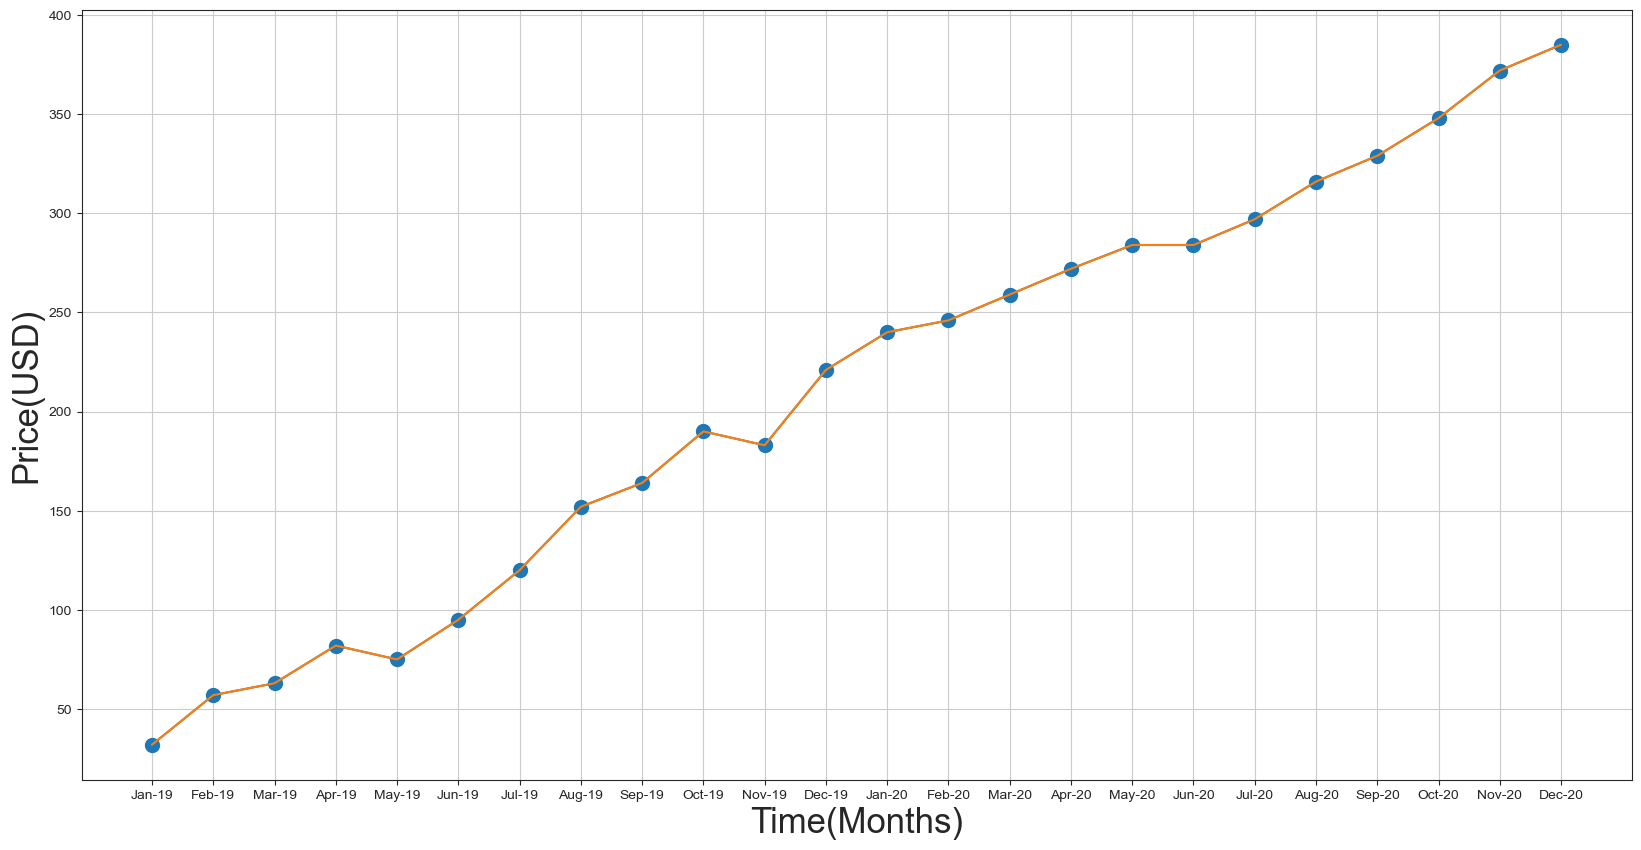

In [6]:
fig = plt.figure(figsize=(20,10))
plt.xlabel('Time(Months)', fontsize=25)
plt.ylabel('Price(USD)', fontsize=25)
plt.grid()
plt.plot(pd.Series(df.index).apply(lambda x: datetime.datetime.strftime(x, "%b-%y")), df['Price'], '-o', markersize=10)
plt.plot(pd.Series(df.index).apply(lambda x: datetime.datetime.strftime(x, "%b-%y")), df['Price'], )
#plt.savefig('test.jpeg')
plt.show()

In [7]:
n_obs = df.shape[0]

train_split_percentage = 0.85

train_data = df.iloc[:round(n_obs * train_split_percentage)]
test_data = df.iloc[round(n_obs * train_split_percentage):]
# Display the Test and train data
print(train_data.shape)
print(test_data.shape)

(20, 1)
(4, 1)


In [8]:
display(train_data.tail())
display(test_data.head())

,Price
Months,
2020-04-30,272.0
2020-05-31,284.0
2020-06-30,284.0
2020-07-31,297.0
2020-08-31,316.0


,Price
Months,
2020-09-30,329.0
2020-10-31,348.0
2020-11-30,372.0
2020-12-31,385.0


<Axes: xlabel='Months', ylabel='Price(USD)'>

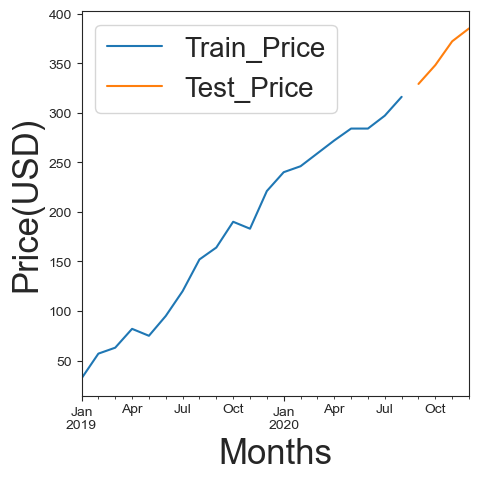

In [9]:
plt.figure(figsize=(5,5))
plt.xlabel('Time(Time Duration)', fontsize=25)
plt.ylabel('Price(USD)', fontsize=25)
plt.rc('legend',fontsize=20)
train_data['Price'].rename('Train_Price').plot(legend=True)
test_data['Price'].rename('Test_Price').plot(legend=True)

In [10]:
from statsmodels.tsa.stattools import adfuller
adf_test_result = adfuller(df['Price'])
adf_test_result

(-0.06645410717675022,
 0.9526790120349874,
 1,
 22,
 {'1%': -3.769732625845229,
  '5%': -3.005425537190083,
  '10%': -2.6425009917355373},
 108.26411910857905)

In [11]:
adftest_result = pd.Series(adf_test_result[:4], index=["Adf test statistic", "p-value", "number of lags", "number of observations"])
adftest_result

Adf test statistic        -0.066454
p-value                    0.952679
number of lags             1.000000
number of observations    22.000000
dtype: float64

In [12]:
from statsmodels.tsa.statespace.tools import diff
df['Price'].head()

Months
2019-01-31    32.0
2019-02-28    57.0
2019-03-31    63.0
2019-04-30    82.0
2019-05-31    75.0
Name: Price, dtype: float64

In [13]:
df['Price'].shift(1).head()

Months
2019-01-31     NaN
2019-02-28    32.0
2019-03-31    57.0
2019-04-30    63.0
2019-05-31    82.0
Name: Price, dtype: float64

In [14]:
diff(df['Price'], k_diff=1)

Months
2019-02-28    25.0
2019-03-31     6.0
2019-04-30    19.0
2019-05-31    -7.0
2019-06-30    20.0
2019-07-31    25.0
2019-08-31    32.0
2019-09-30    12.0
2019-10-31    26.0
2019-11-30    -7.0
2019-12-31    38.0
2020-01-31    19.0
2020-02-29     6.0
2020-03-31    13.0
2020-04-30    13.0
2020-05-31    12.0
2020-06-30     0.0
2020-07-31    13.0
2020-08-31    19.0
2020-09-30    13.0
2020-10-31    19.0
2020-11-30    24.0
2020-12-31    13.0
Name: Price, dtype: float64

<Axes: xlabel='Months'>

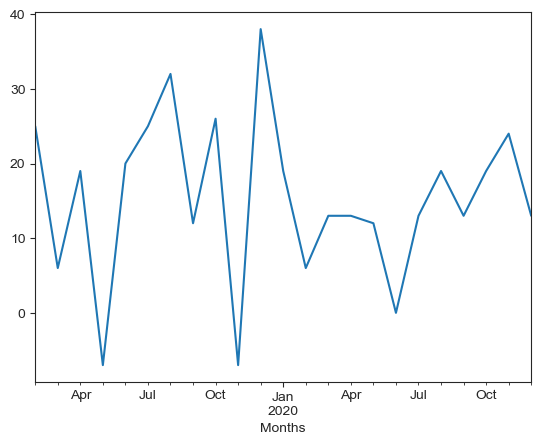

In [15]:
diff(df['Price'], k_diff=1).plot()

In [16]:
adf_test_result_new = adfuller(diff(df['Price'], k_diff=1))
adf_test_result_new

(-6.14577303902978,
 7.774044677109174e-08,
 0,
 22,
 {'1%': -3.769732625845229,
  '5%': -3.005425537190083,
  '10%': -2.6425009917355373},
 96.08325851295903)

In [17]:
adftest_result_new = pd.Series(adf_test_result_new[:4], index=["Adf test statistic", "p-value", "number of lags", "number of observations"])
adftest_result_new

Adf test statistic       -6.145773e+00
p-value                   7.774045e-08
number of lags            0.000000e+00
number of observations    2.200000e+01
dtype: float64

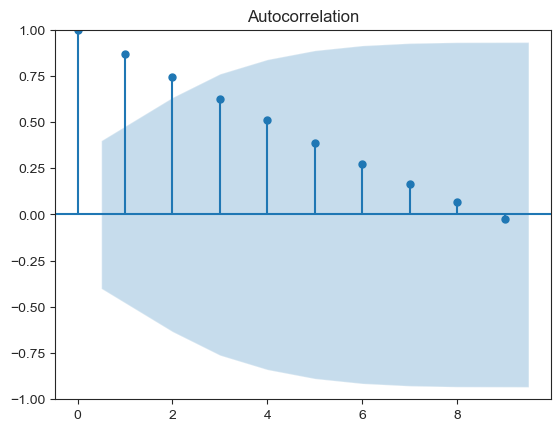

In [18]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df['Price'], lags=9);

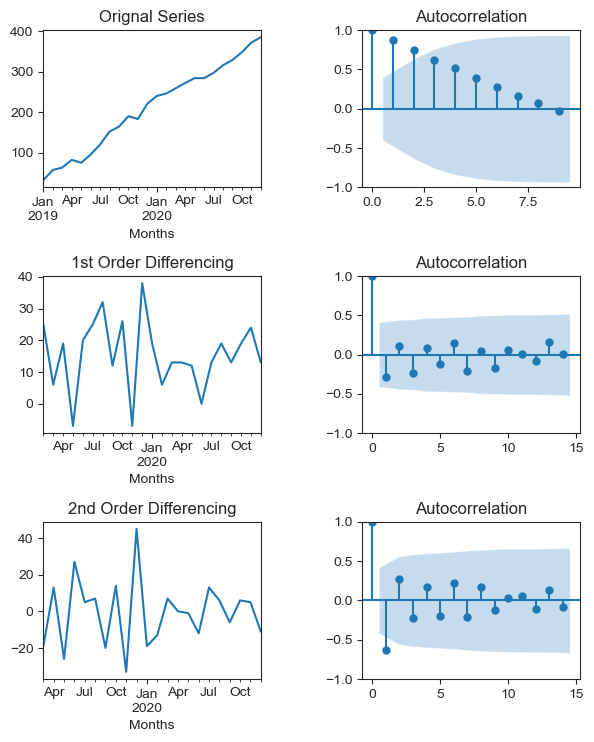

In [19]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(7,8))

fig.tight_layout(pad=4.5)

df['Price'].plot(ax=axs[0,0], title="Orignal Series")
plot_acf(df['Price'], lags=9, title="Autocorrelation", ax=axs[0][1])

diff(df['Price'], k_diff=1).plot(ax=axs[1,0], title="1st Order Differencing")
plot_acf(diff(df['Price'], k_diff=1), title="Autocorrelation", ax=axs[1][1])

diff(df['Price'], k_diff=2).plot(ax=axs[2,0], title="2nd Order Differencing")
plot_acf(diff(df['Price'], k_diff=2), title="Autocorrelation", ax=axs[2][1])
plt.savefig('test2.jpeg')
plt.show()

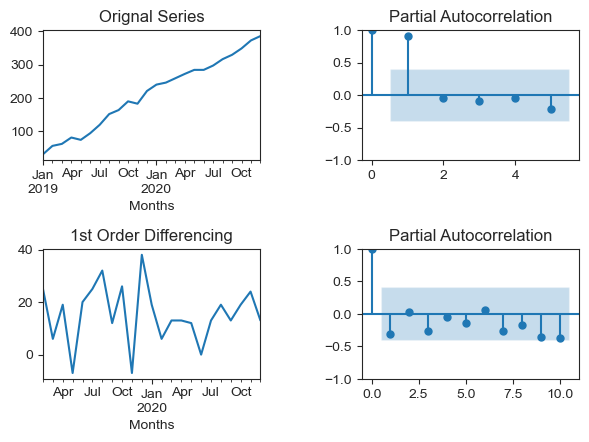

In [20]:
from statsmodels.graphics.tsaplots import plot_pacf
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(7,5))

fig.tight_layout(pad=4.5)

df['Price'].plot(ax=axs[0,0], title="Orignal Series")
plot_pacf(df['Price'], lags=5, title="Partial Autocorrelation", ax=axs[0][1])

diff(df['Price'], k_diff=1).plot(ax=axs[1,0], title="1st Order Differencing")
plot_pacf(diff(df['Price'], k_diff=1), lags=10, title="Partial Autocorrelation", ax=axs[1][1])
plt.savefig('test.jpeg')
plt.show()

In [21]:
from pmdarima import auto_arima
x = auto_arima(train_data['Price'], seasonal=False, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=151.355, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=151.532, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=151.552, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=167.761, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=152.923, Time=0.04 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.419 seconds


In [22]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train_data['Price'], order=(0, 1, 0))

model_fit = model.fit()
model_fit.summary()

C:\Program Files\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Program Files\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Program Files\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Price   No. Observations:                   20
Model:                 ARIMA(0, 1, 0)   Log Likelihood                 -82.881
Date:                Wed, 17 Apr 2024   AIC                            167.761
Time:                        17:32:45   BIC                            168.706
Sample:                    01-31-2019   HQIC                           167.921
                         - 08-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       360.1072    161.043      2.236      0.025      44.469     675.745
===================================================================================
Ljung-Box (L1) (Q):                   2.03   Jarque-Bera (JB):                 0.20
Prob(Q):                              0.15   Prob(JB):                         0.90
Heteroskedasticity (H):               0.48   Skew:                            -0.17
Prob(H) (two-sided):                  0.40   Kurtosis:                         2.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""